In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
sns.set_theme(style="ticks")

In [5]:
pwd

'c:\\Users\\julie\\Desktop\\C.O.D.E. Lancashire\\Python-Module-main\\Datasets\\penguins'

In [6]:
df = pd.read_csv('penguin_sizes_dataset.csv')

In [7]:
#Data consists of:
#Species - Penguin species
#Island - Island the penguin belongs to
#Culmen_Length_mm - length of the penguins bill 
#Culmen_Depth_mm - depth of the penguins bill
#Flipper_Length_mm - flipper length of the penguin
#Body_Mass_g - Body mass of the penguin
#Sex - Gender of the penguin

In [8]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [10]:
#what columns do we have on the dataset
df.keys()

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
#rows and columns of the dataframe
df.shape

(344, 7)

In [12]:
#for more info. inc. columns, rows and also giving data type (data type can be done with df.dtypes)
df.info()

#note that the memory usage is calculated based on the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
#There is a dot in the data for the males and females that needs to be dealt with
sex_counts = df['sex'].value_counts()
sex_counts

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
from numpy import nan

In [15]:
#tried various ways to replace the dot '.' with NaN but I kept getting an extra male
#trying another way - define the string
df.replace('.', np.NaN, inplace=True)

In [16]:
#checking the data and whether the NaN has been added
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
#to drop all the files containing Nan
df = df.dropna()

In [18]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [19]:
df.shape

(333, 7)

In [20]:
num_penguins = df['species'].value_counts()
num_penguins

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

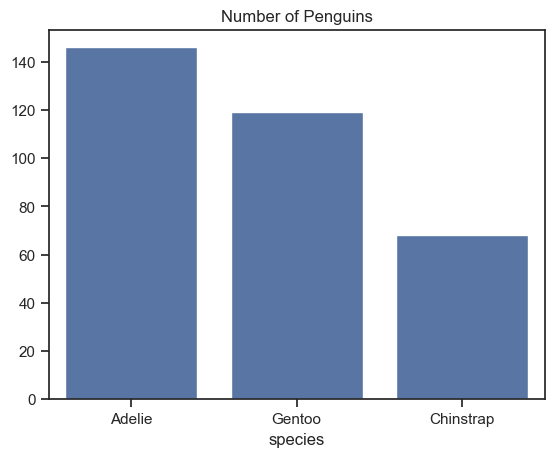

In [21]:
#create a plot showing different species and values
sns.barplot(x= num_penguins.index, y = num_penguins.values)
plt.title('Number of Penguins')
plt.show()

In [22]:
num_location = df['island'].value_counts()
num_location

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

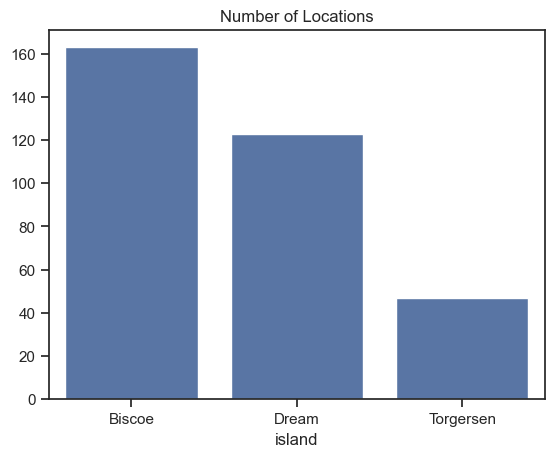

In [23]:
#create a plot showing different islands and values
sns.barplot(x = num_location.index, y = num_location.values)
plt.title('Number of Locations')
plt.show()

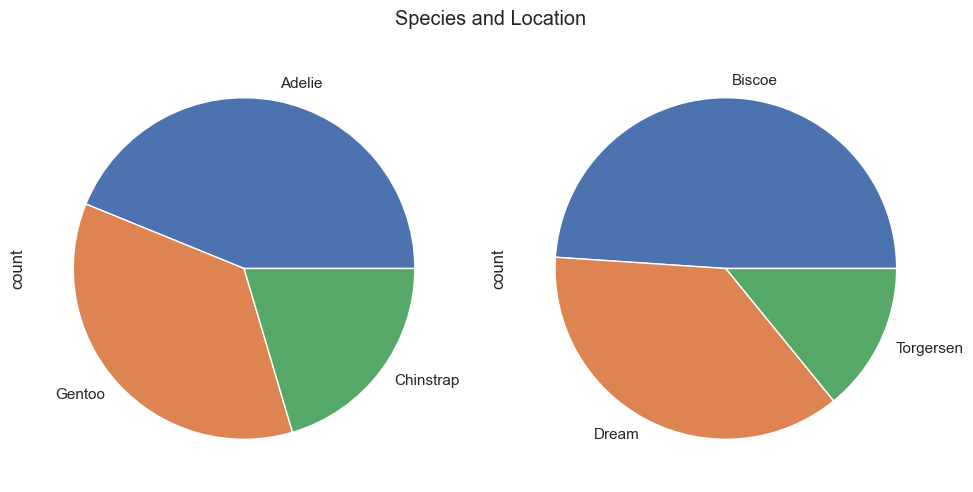

In [24]:
#pie chart to show the species and location counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df['species'].value_counts().plot(kind='pie', ax=axes[0])
df['island'].value_counts().plot(kind='pie', ax=axes[1])

fig.suptitle('Species and Location')
plt.tight_layout()

In [25]:
#the values for the males and females
num_sex = df['sex'].value_counts()
num_sex

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

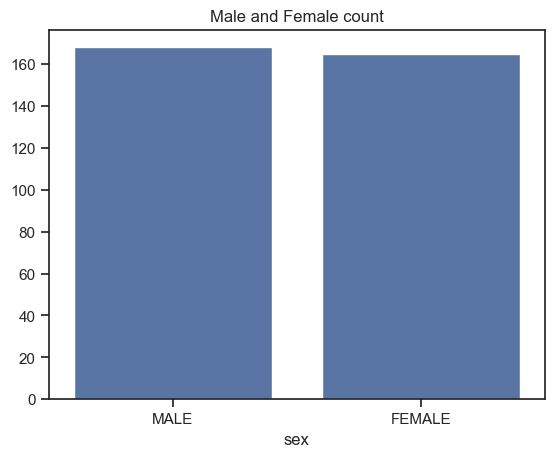

In [26]:
##create a plot showing different sex and values
sns.barplot(x = num_sex.index, y = num_sex.values)
plt.title('Male and Female count')
plt.show()

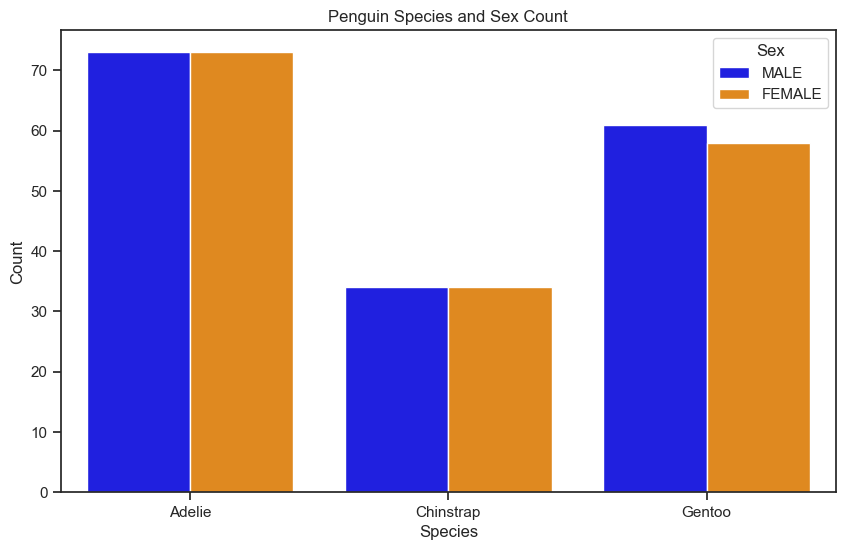

In [27]:
#there are a similar number of males and females - what about the number in each species
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='sex', data=df, palette=('Blue', 'DarkOrange'))
plt.title('Penguin Species and Sex Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

In [28]:
df.keys()

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

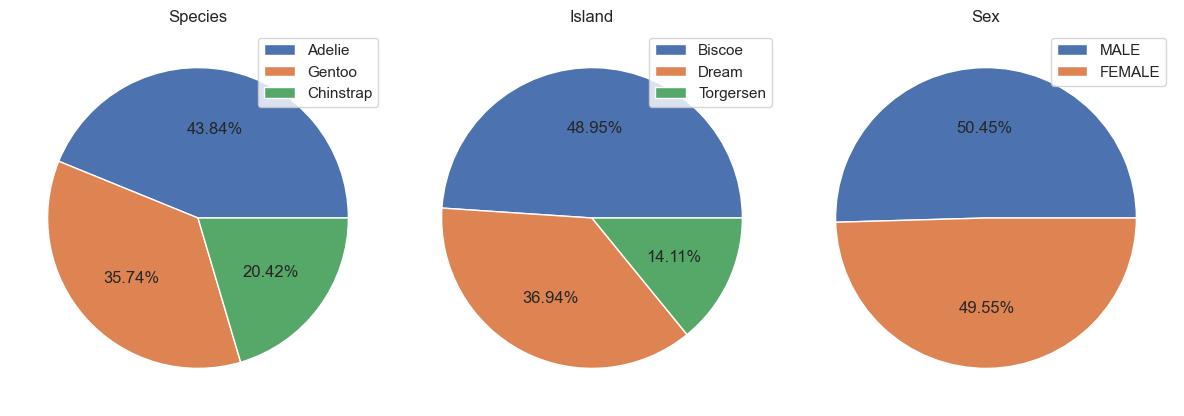

In [29]:
#pie-charts to show species, island and sex and percentages (autopct)
penguins = ["species", "island", "sex"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
for i in range(3):
    counts = df[penguins[i]].value_counts()
    #matplotlib show percentage with two decimal points
    axes[i].pie(counts, autopct="%1.2f%%") 
    axes[i].legend(counts.index)
    axes[i].set_title(penguins[i].capitalize())
    
plt.tight_layout()
plt.show()

In [30]:
##what I would like to know is how many of each species are on each island
def pies(x, name):
    species = df["species"].unique()
    fig, axes = plt.subplots(nrows=1, ncols=len(species), figsize=(12, 6))
    for i, p in enumerate(species):
        temp_df = df[df["species"] == p].copy()
        counts = temp_df[x].value_counts()
        #matplotlib show percentage with two decimal points
        axes[i].pie(counts, autopct="%1.2f%%", )
        axes[i].legend(counts.index)
        axes[i].set_title(p)
    plt.suptitle(name) 
    plt.tight_layout()
    plt.show()

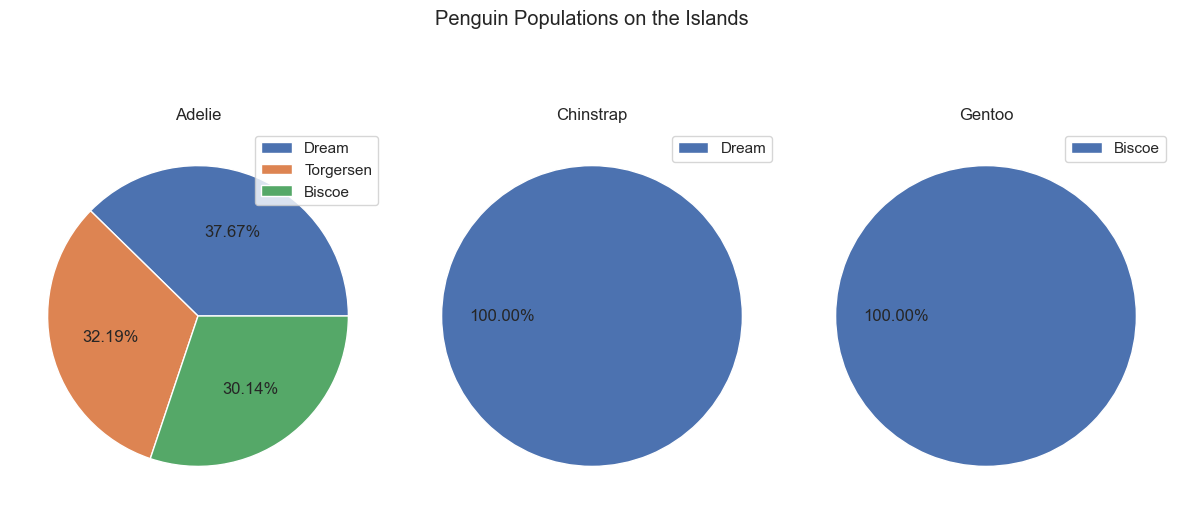

In [31]:
pies("island", "Penguin Populations on the Islands")

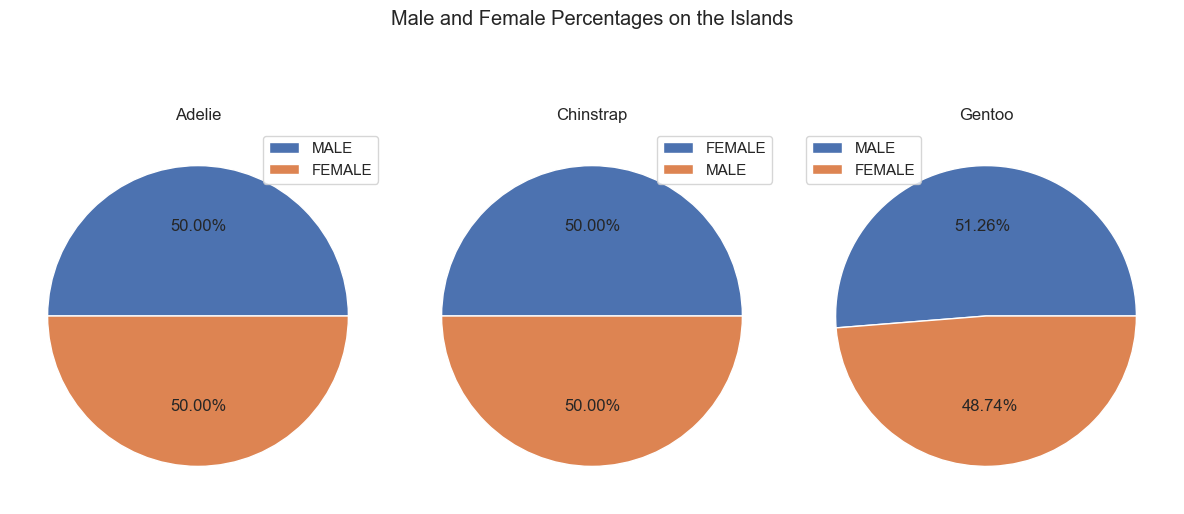

In [32]:
pies("sex", "Male and Female Percentages on the Islands")

In [33]:
#starting to look at penguin sizes
#culmen=upper ridge of bill, flipper=wing and body mass=size - show a diagram!
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


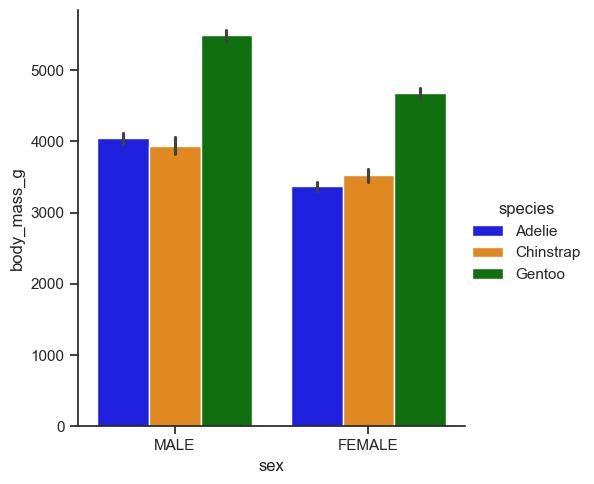

In [34]:
sns.catplot(x="sex", y="body_mass_g", hue="species", data=df, kind="bar", 
            palette=('Blue', 'DarkOrange', 'Green'))

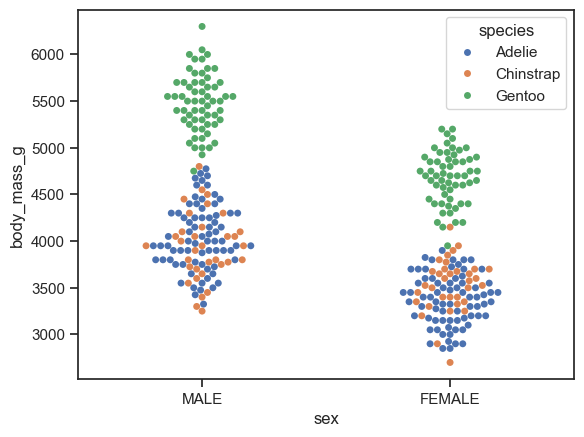

In [35]:
#Scatterplot with categorical variables
ax = sns.swarmplot(data=df, x="sex", y="body_mass_g", hue="species")

Text(0.5, 1.0, 'flipper length mm')

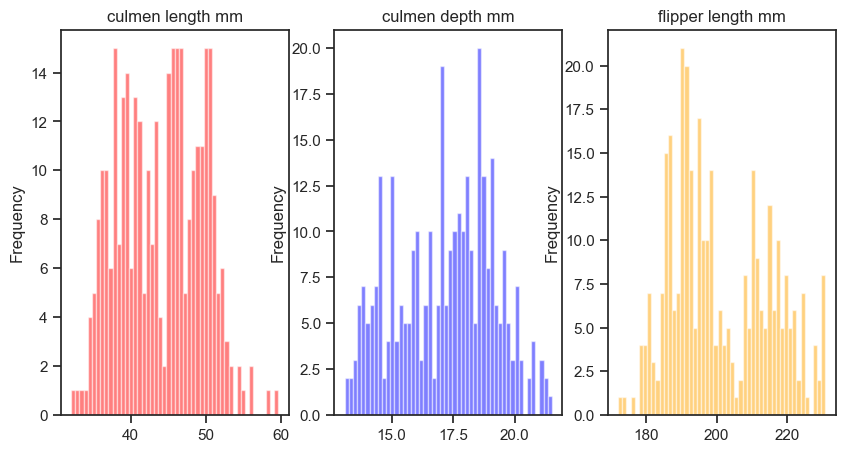

In [36]:
#Using a plot graph from a lesson (pokemon) to get some idea of the penguin sizes 
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
df['culmen_length_mm'].plot.hist(ax=axes[0], bins=50, alpha=0.5, color='Red')
axes[0].set_title('culmen length mm')

df['culmen_depth_mm'].plot.hist(ax=axes[1], bins=50, alpha=0.5, color='Blue')
axes[1].set_title('culmen depth mm')

df['flipper_length_mm'].plot.hist(ax=axes[2], bins=50, alpha=0.5, color='Orange')
axes[2].set_title('flipper length mm')


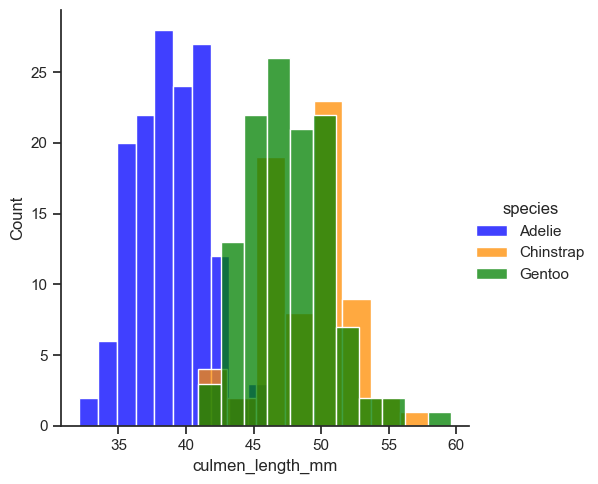

In [37]:
sns.FacetGrid(df, hue="species", height=5, palette=('Blue', 'DarkOrange', 'Green')).map(sns.histplot,"culmen_length_mm").add_legend();

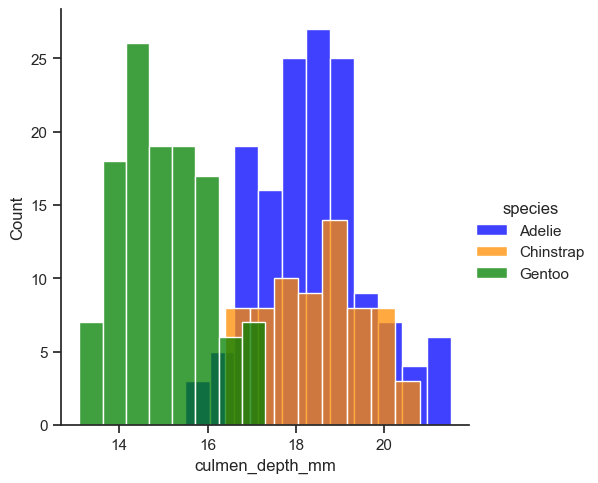

In [38]:
sns.FacetGrid(df, hue="species", height=5, palette=('Blue', 'DarkOrange', 'Green')).map(sns.histplot,"culmen_depth_mm").add_legend();

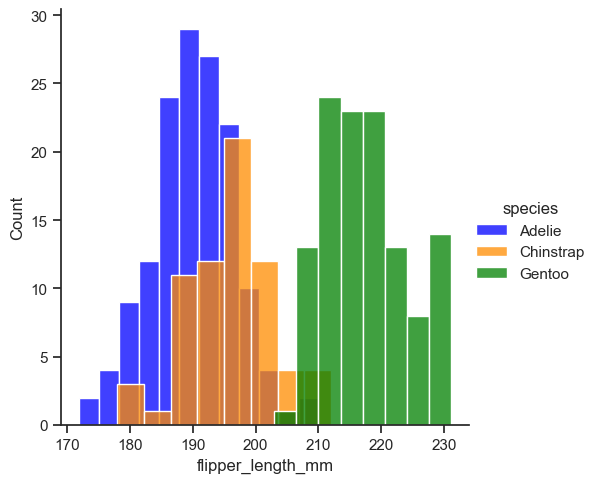

In [39]:
sns.FacetGrid(df, hue="species", height=5, palette=('Blue', 'DarkOrange', 'Green')).map(sns.histplot,"flipper_length_mm").add_legend();

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

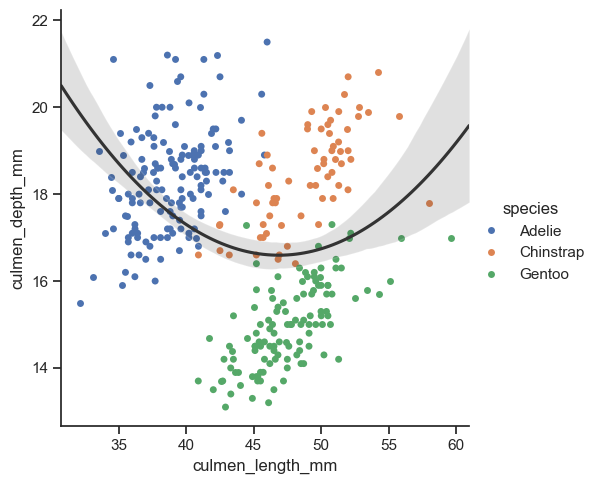

In [40]:
#Regression fit over a strip plot
sns.catplot(
    data=df, x="culmen_length_mm", y="culmen_depth_mm", hue="species",
    native_scale=True, zorder=1
)
sns.regplot(
    data=df, x="culmen_length_mm", y="culmen_depth_mm",
    scatter=False, truncate=False, order=2, color=".2",
)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

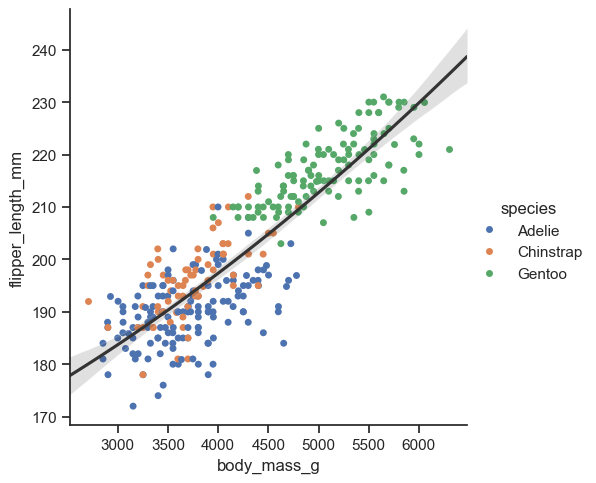

In [41]:
#Regression fit over a strip plot
sns.catplot(
    data=df, x="body_mass_g", y="flipper_length_mm", hue="species",
    native_scale=True, zorder=1
)
sns.regplot(
    data=df, x="body_mass_g", y="flipper_length_mm",
    scatter=False, truncate=False, order=2, color=".2",
)

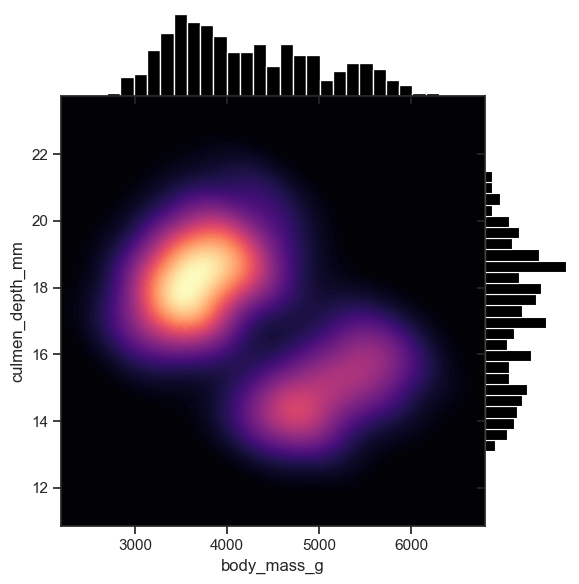

In [42]:
g = sns.JointGrid(data=df, x="body_mass_g", y="culmen_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="magma")
g.plot_marginals(sns.histplot, color="black", alpha=1, bins=25)